# Problem
HELP International là 1 tổ chức quốc tế giúp chống lại sự nghèo đói và cung cấp các dịch vụ cơ bản cho người dân ở các nước đang phát triển trong suốt thời gian dịch bệnh hay chiến tranh.

Các trường dữ liệu bao gồm:
1. Name of country: tên của quốc gia
2. child_mort: số trẻ em mất dưới 5 tuổi trên 1000 lần sinh
3. exports: chỉ số xuất khẩu
4. health: chỉ số %age of GDP trên capita
5. imports: chỉ số nhập khẩu
6. income: thu nhập
7. inflation: lạm phát
8. life_expec: trung bình số năm 1 người sống
9. total_fer: số trẻ sinh ra bởi 1 người mẹ
10. gdpp: GDP/captia

# Target
Phân loại các đất nước dựa trên yếu tố kinh tế xã hội và sức khỏe trong các nước phát triển.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Overview

In [2]:
#load các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
colors = ['#DB1C18','#DBDB3B','#51A2DB']
sns.set(palette = colors,font = "Serif",style = 'white',rc ={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN,KMeans




In [3]:
#load file dữ liệu
pd.set_option('display.max_colwidth',180)
df = pd.read_csv("/content/drive/MyDrive/Country_Classification/Country-data.csv")
data_dict = pd.read_csv("/content/drive/MyDrive/Country_Classification/data-dictionary.csv")

In [4]:
#xem dữ liệu bao gồm các trường như nào
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [5]:
#xem cụ thể giá trị của từng trường dữ liệu
df.info(verbose= True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#số dòng và cột của dữ liệu
df.shape

(167, 10)

In [7]:
#xem các đặc trưng của dữ liệu
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
#kiểm tra null value
df.isnull().sum() # or df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#Visualiztion and Processing

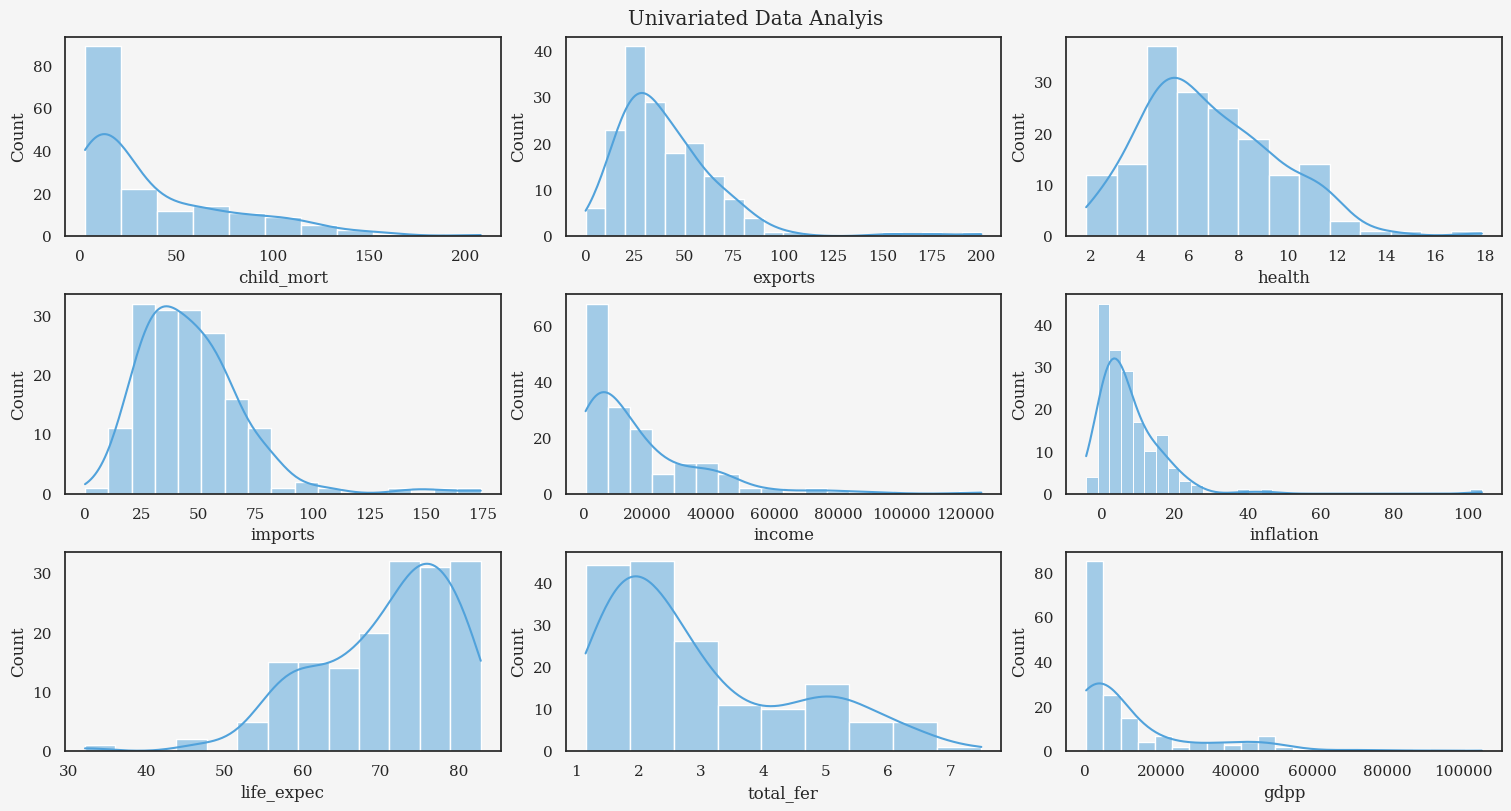

In [9]:
fig,ax = plt.subplots(nrows =3,ncols=3,figsize =(15,8),constrained_layout = True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols = df.select_dtypes(exclude ='object').columns
for x , i in enumerate(int_cols):
    sns.histplot(df[i],ax=ax[x],kde = True,color = colors[2])


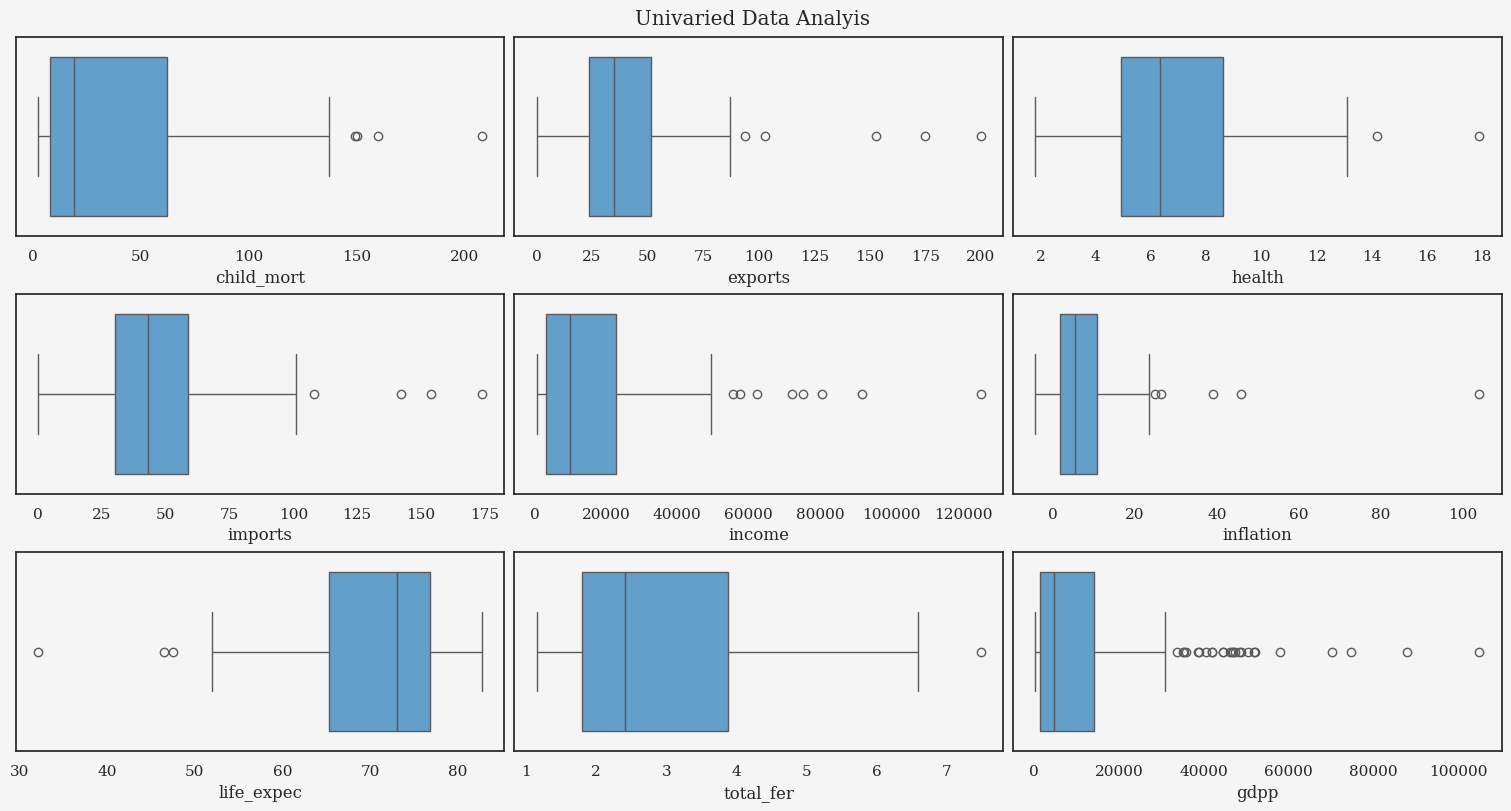

In [10]:
#kiểm tra xem các trường dữ liệu có outlier không?
fig ,ax = plt.subplots(ncols= 3,nrows = 3,figsize = (15,8),constrained_layout = True)
plt.suptitle("Univaried Data Analyis ")
ax = ax.flatten()
int_cols = df.select_dtypes(exclude = 'object').columns
for x ,i in enumerate(int_cols):
    sns.boxplot(x = df[i],ax =ax[x],color = colors[2])

### Quan sát

1. Cả Biểu đồ và sơ đồ hộp đều thể hiện rõ ràng rằng các đặc điểm số là các giá trị liên tục hoặc rời rạc. không có tính năng nào có giá trị phân loại.
2. Biểu đồ hình hộp cho chúng ta thấy có những ngoại lệ rõ ràng trong các tính năng child_mort, xuất khẩu, nhập khẩu, thu nhập, gdpp. tuy nhiên, những thông tin này thuộc về mỗi quốc gia. vì vậy, chúng ta không thể mong đợi các giá trị được phân phối chuẩn mà không có giá trị ngoại lệ.
3. Ngoài ra, phần trình bày vấn đề còn mô tả rõ ràng việc chúng ta cần tập hợp các quốc gia cần trợ giúp. vì vậy, có những thuật toán phân cụm như khoảng cách Manhaten ít nhạy cảm hơn đối với các ngoại lệ.

## Bivariated Data Analysis(Mối quan hệ giữa 2 trường với nhau)

In [11]:
px.scatter(data_frame =df,x = 'exports',y ='imports',size='gdpp',text ='country',color ='gdpp',title= 'Countries by Export & Import and corresponding GDP')

In [12]:
for i in int_cols:
    fig=px.choropleth(data_frame=df, locationmode='country names', locations='country', color=i, title=f'{i} rate by countries')
    fig.show()

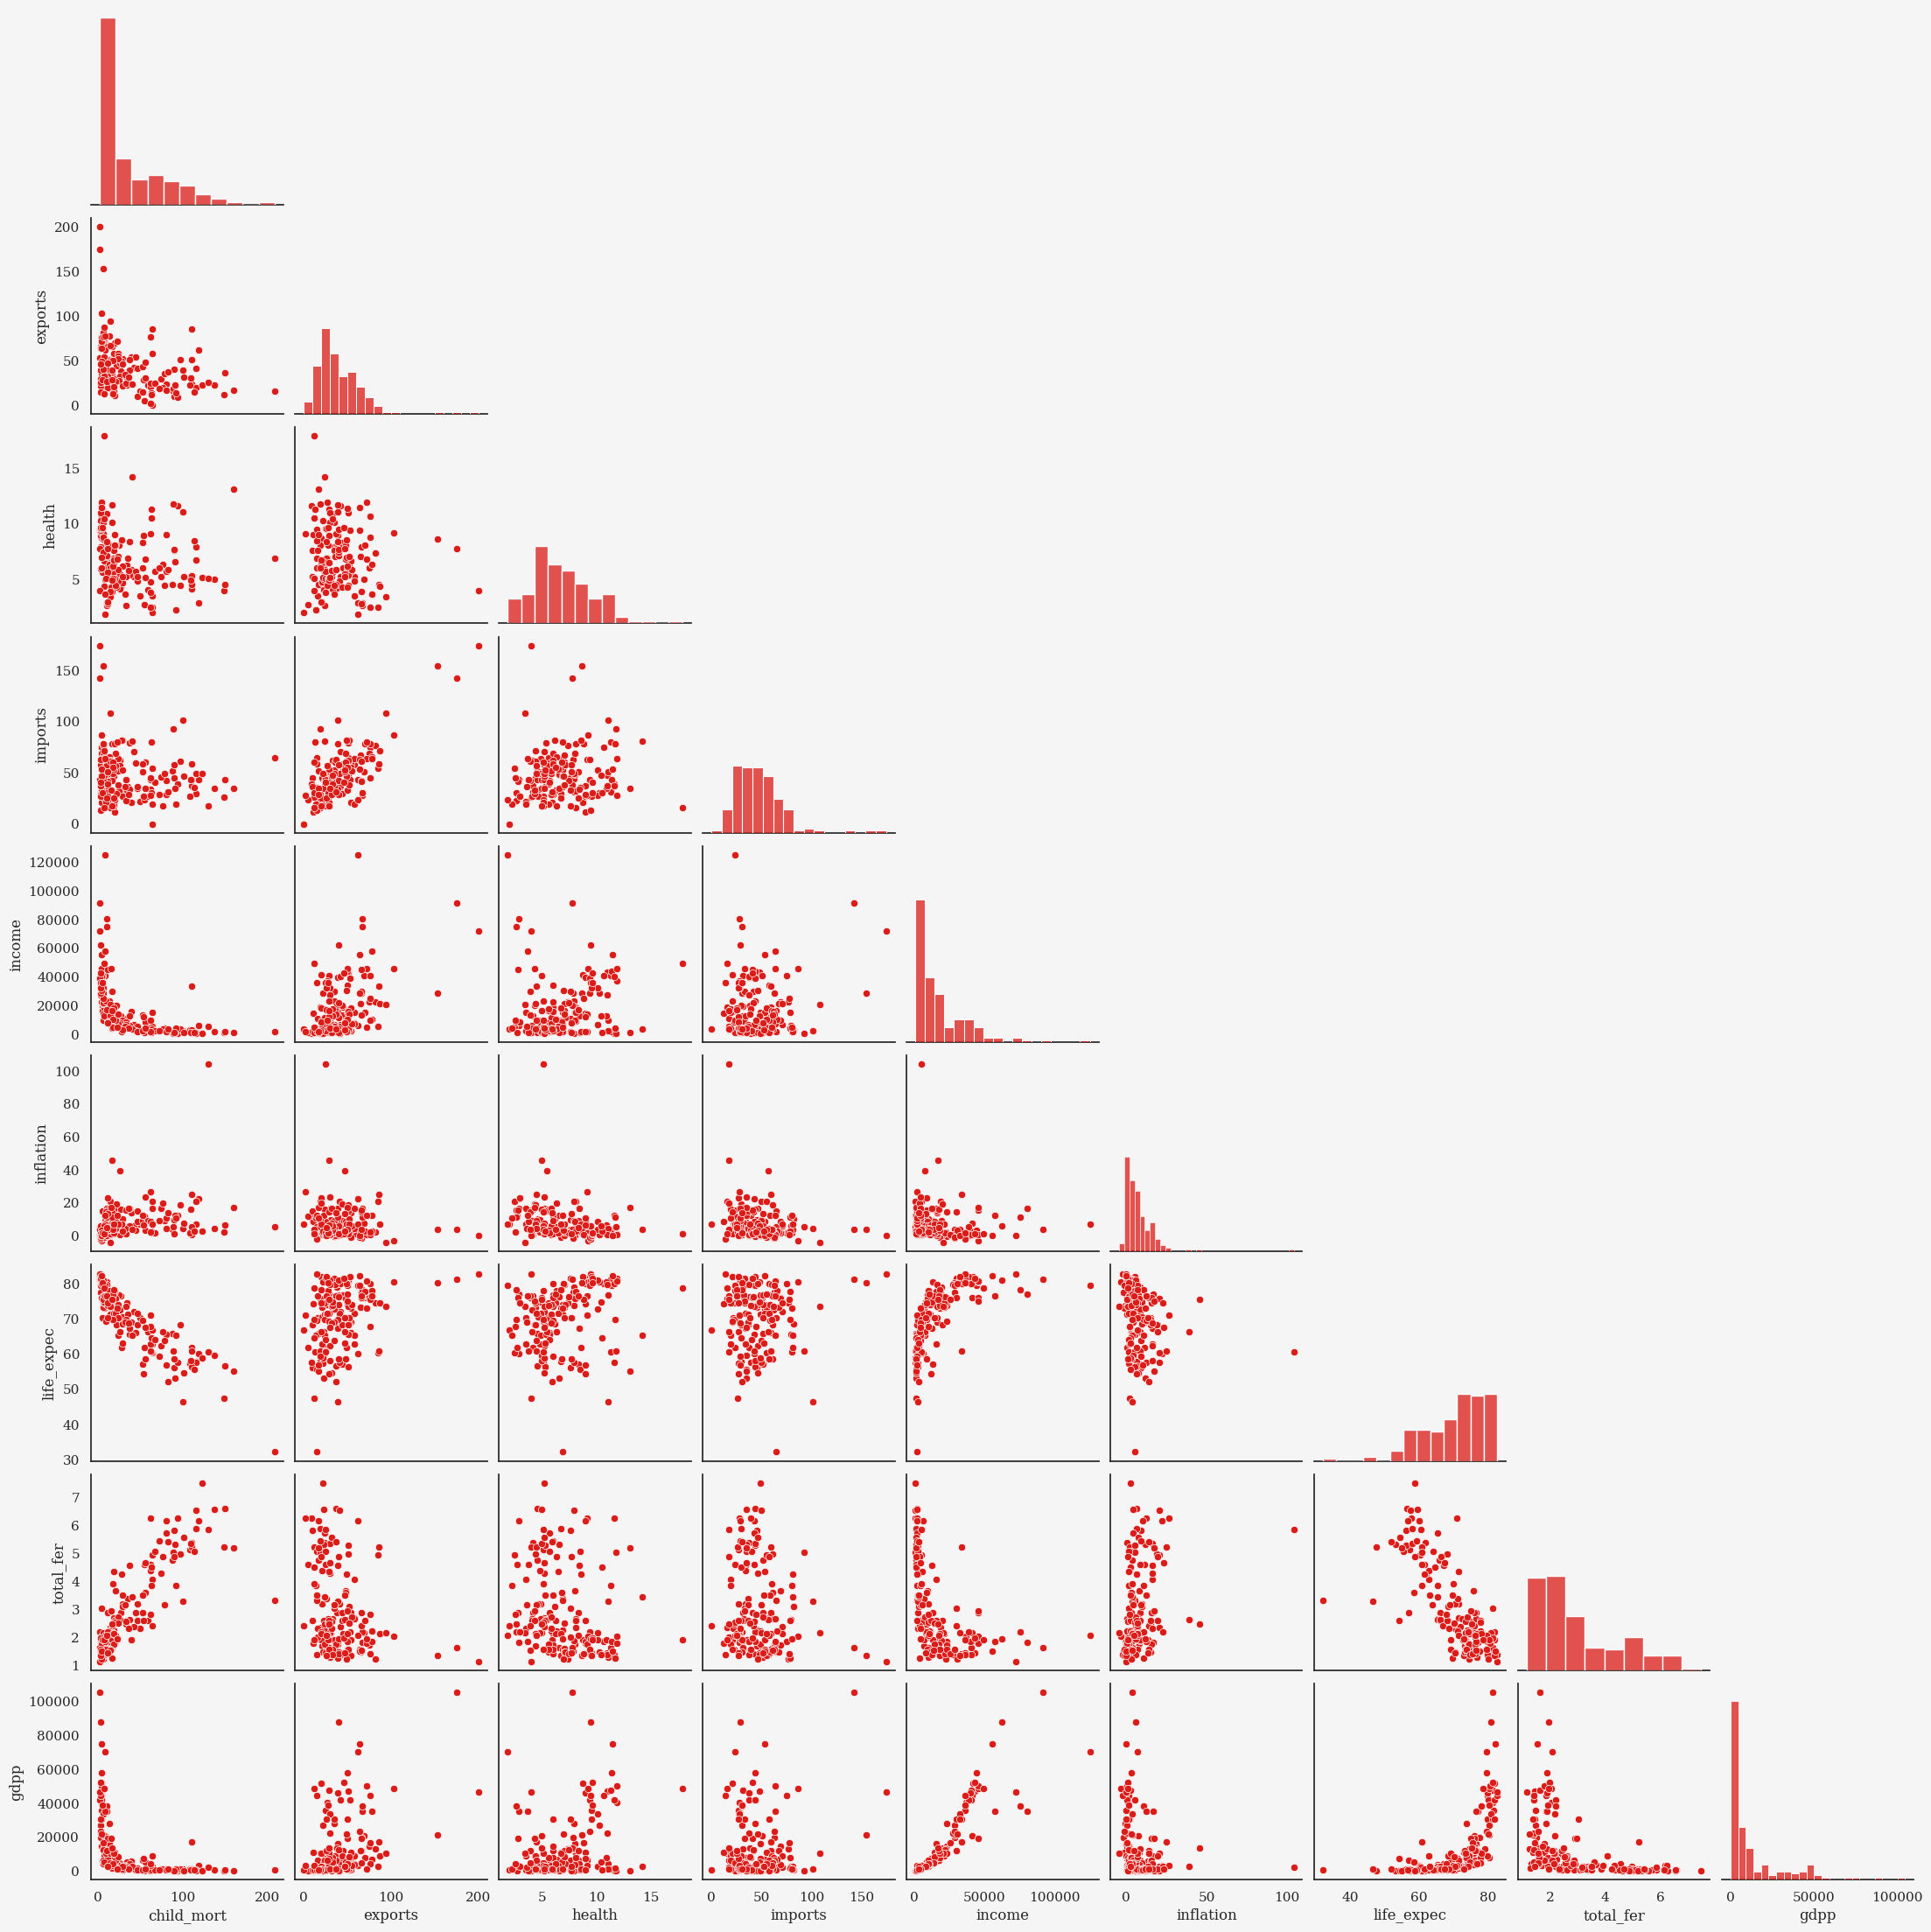

In [13]:
sns.pairplot(df,corner = True)

### Nhận xét:

1. Child_mort có mối quan hệ nghịch biến với GDP vì tỷ lệ tử vong ở trẻ em càng thấp thì GDP càng tăng và ngược lại.
2. Xuất khẩu, Thu nhập, Thu nhập có mối quan hệ tỉ lệ thuận rõ ràng với GDP.
3. Total_fer và child_mort có mối quan hệ thuận chiều.
4. Total_fer và life_expec có mối quan hệ nghịch biến.
5. life_expec và childe_mort có mối quan hệ nghịch biến

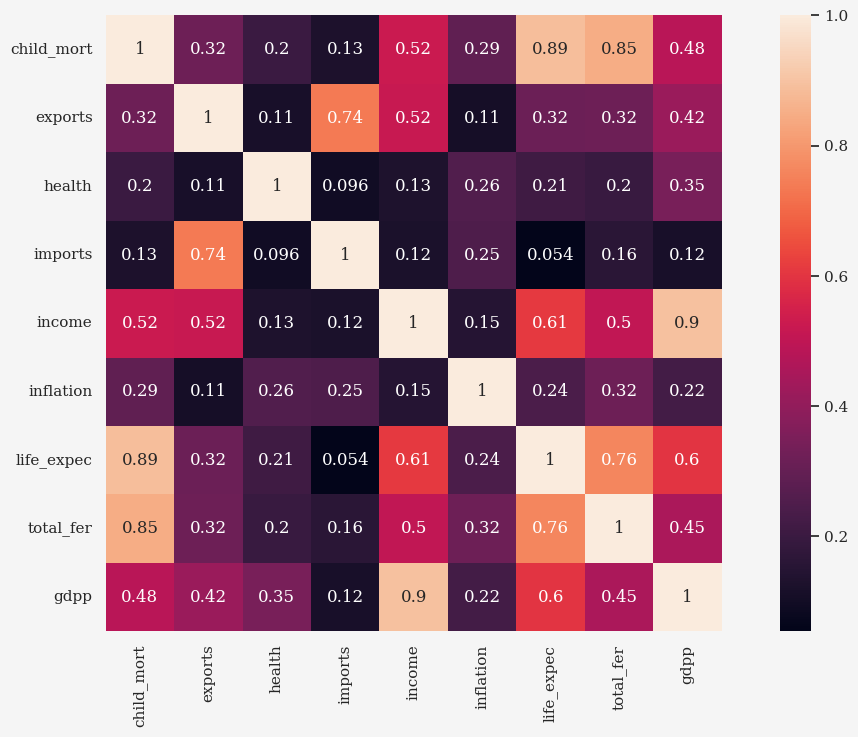

In [14]:
# Lọc ra các cột chứa dữ liệu số
numeric_cols = df.select_dtypes(include='number')
# Tính toán ma trận tương quan cho các cột số
corr_matrix = numeric_cols.corr().abs()
#vẽ
fig = plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, square=True)
plt.show()


# Data Modeling with PCA( Giảm chiều dữ liệu)

In [15]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df.drop(['country'],axis =1))

In [16]:
#gọi và khởi tạo PCA cho bài toán
from sklearn.decomposition import PCA
decom =PCA(svd_solver ='auto')
decom.fit(df_scaled)

PCA()

[0.46 0.63 0.76 0.87 0.94 0.96 0.97 0.98 0.99]


Text(0, 0.5, 'Explaned variance ratio')

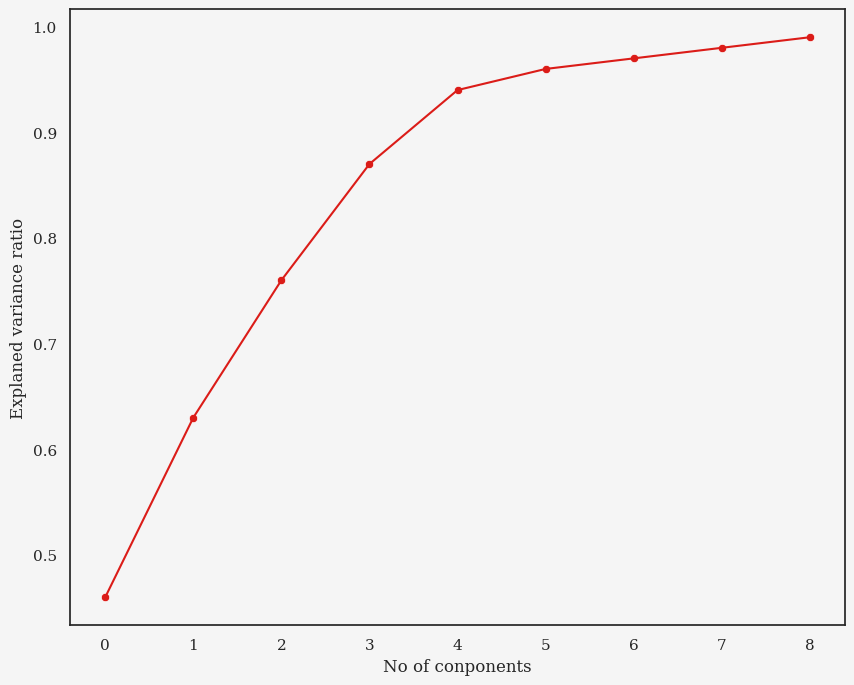

In [17]:
cum_exp_ratio = np.cumsum(np.round(decom.explained_variance_ratio_,2))
print(cum_exp_ratio)
fig = plt.figure(figsize = (10,8))
ax = sns.lineplot(y = cum_exp_ratio,x = np.arange(0,len(cum_exp_ratio)))
ax = sns.scatterplot(y =cum_exp_ratio,x = np.arange(0,len(cum_exp_ratio)))
ax.set_xlabel('No of conponents')
ax.set_ylabel('Explaned variance ratio')





PCA với số cụm 3 và 4 là độ lệch trong tỷ lệ phương sai. thậm chí 5 cũng có thể được coi là sự khác biệt ít hơn. vì vậy, chúng ta hãy thử sử dụng kết hợp cụm 3,4,5 trong phân cụm K_Mean

### Hierarchical Clustering (Phân cụm theo bậc)

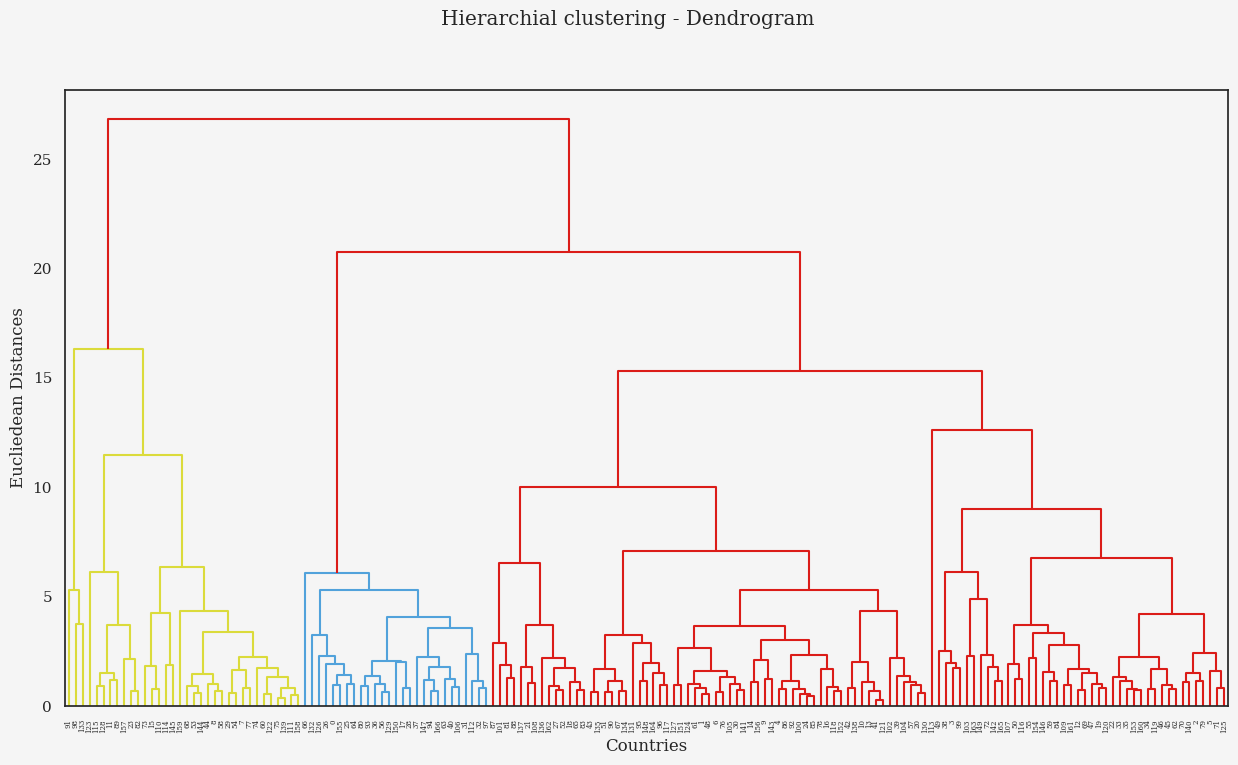

In [18]:
import scipy.cluster.hierarchy as sch
fig = plt.figure(figsize = (15,8))
dendrogram = sch.dendrogram(sch.linkage(df_scaled,method ='ward'))
plt.suptitle('Hierarchial clustering - Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Eucliedean Distances')
plt.show()



#K-mean Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

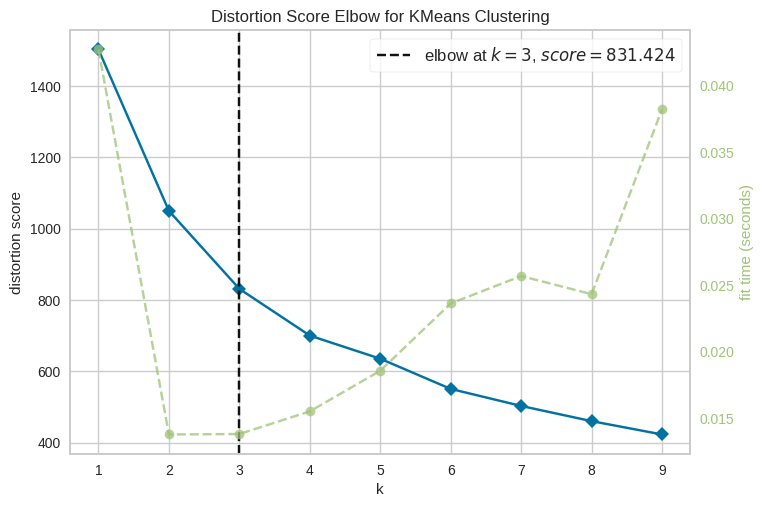

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# elbow cho kiểm tra số cluster hợp lí nhất
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(df_scaled)
visualize.poof()

Phương pháp khuỷu tay là phương pháp phổ biến được sử dụng để xác nhận thuật toán phân cụm. ở đây chúng ta có thể thấy giá trị K là 3 với điểm biến dạng tương đối tốt.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<Axes: xlabel='child_mort', ylabel='health'>

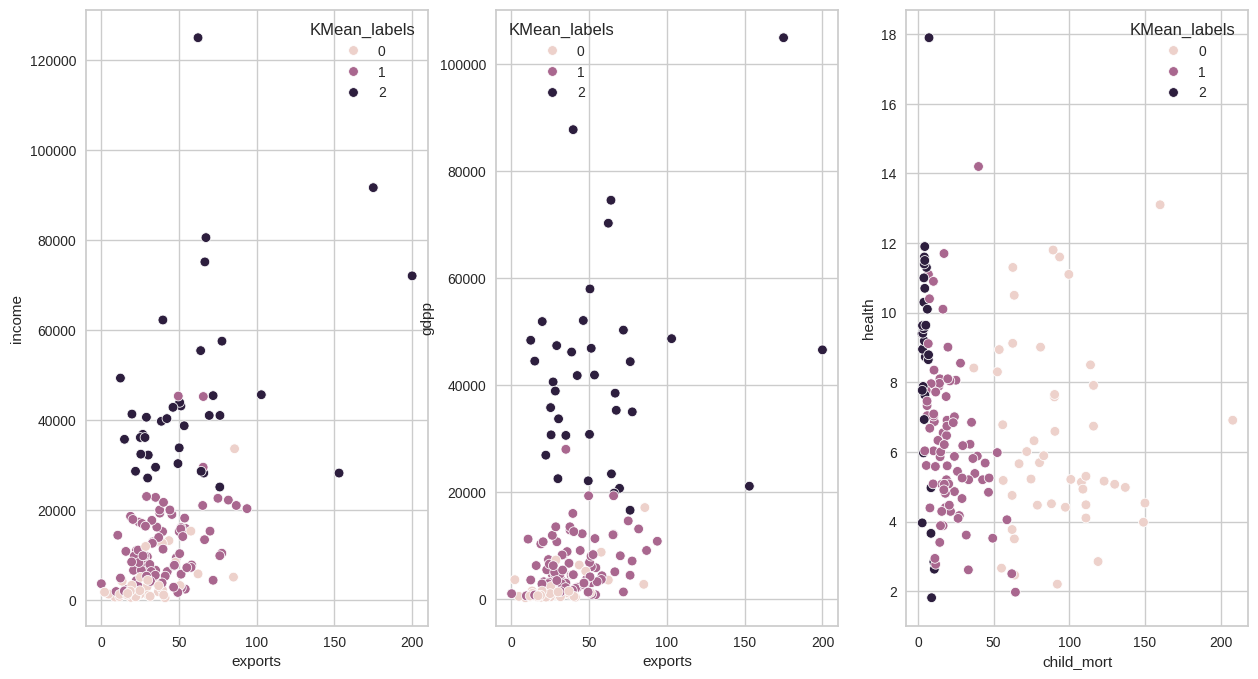

In [20]:
model = KMeans(n_clusters =3,random_state = 1)
model.fit(df_scaled)
df['KMean_labels'] = model.labels_
fig ,ax = plt.subplots(nrows = 1 ,ncols = 3,figsize =(15,8))
sns.scatterplot(data =df,x ='exports',y ='income',hue ="KMean_labels",ax =ax[0])
sns.scatterplot(data =df,x ='exports',y ='gdpp',hue ="KMean_labels",ax =ax[1])
sns.scatterplot(data =df,x = "child_mort",y ="health",hue ="KMean_labels",ax = ax[2])




In [21]:
df.groupby(['KMean_labels','country']).mean()

child_mort  exports  health  imports  \
KMean_labels country                                                      
0            Afghanistan                 90.2     10.0    7.58     44.9   
             Angola                     119.0     62.3    2.85     42.9   
             Benin                      111.0     23.8    4.10     37.2   
             Botswana                    52.5     43.6    8.30     51.3   
             Burkina Faso               116.0     19.2    6.74     29.6   
...                                       ...      ...     ...      ...   
2            Sweden                       3.0     46.2    9.63     40.7   
             Switzerland                  4.5     64.0   11.50     53.3   
             United Arab Emirates         8.6     77.7    3.66     63.6   
             United Kingdom               5.2     28.2    9.64     30.8   
             United States                7.3     12.4   17.90     15.8   

                                    income  inflation  life_expec  total_fer  \
KMean_labels country                                                           
0            Afghanistan            1610.0      9.440        56.2       5.82   
             Angola                 5900.0     22.400        60.1       6.16   
             Benin                  1820.0      0.885        61.8       5.36   
             Botswana              13300.0      8.920        57.1       2.88   
             Burkina Faso           1430.0      6.810        57.9       5.87   
...                                    ...        ...         ...        ...   
2            Sweden                42900.0      0.991        81.5       1.98   
             Switzerland           55500.0      0.317        82.2       1.52   
             United Arab Emirates  57600.0     12.500        76.5       1.87   
             United Kingdom        36200.0      1.570        80.3       1.92   
             United States         49400.0      1.220        78.7       1.93   

                                      gdpp  
KMean_labels country                        
0            Afghanistan             553.0  
             Angola                 3530.0  
             Benin                   758.0  
             Botswana               6350.0  
             Burkina Faso            575.0  
...                                    ...  
2            Sweden                52100.0  
             Switzerland           74600.0  
             United Arab Emirates  35000.0  
             United Kingdom        38900.0  
             United States         48400.0  

[167 rows x 9 columns]

In [22]:
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled,labels = model.labels_)

0.28329575683463126

In [23]:
cat = {0:'Need Help',1 :"Might need help",2 :"No help needed"}
df['KMean_labels'] = df['KMean_labels'].map(cat)
px.choropleth(data_frame=df,locationmode ='country names',locations ='country',
              color=df['KMean_labels'], title='Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular')



In [24]:
px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['KMean_labels'], title='African Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular', scope='africa')

In [25]:
px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['KMean_labels'], title='Asian Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular', scope='asia')

### Nhận xét: Tôi đã nhóm các quốc gia thành 3 loại.

1. Cần giúp đỡ
2. Có thể cần giúp đỡ
3. Không cần trợ giúp
### Phần kết luận:

1. Hầu hết các quốc gia Châu Phi và Pakistan, Afghanistan, Iraq, Yemen, Lào, v.v. đều thuộc danh mục "Cần trợ giúp" dựa trên GDP, Thu nhập, Tỷ lệ sức khỏe, v.v.
2. Hầu hết các nước châu Á đều thuộc loại thứ 2
Các quận của Mỹ, Úc, Canada và châu Âu có thể không cần trợ giúp

In [26]:
df[df['KMean_labels'] == 'Need Help']['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

#DBSCAN

In [27]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Need Help
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Might need help
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Might need help
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Need Help
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Might need help
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Might need help
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Might need help
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Might need help
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Need Help


In [28]:
count_data = df[["child_mort",'imports','gdpp']]

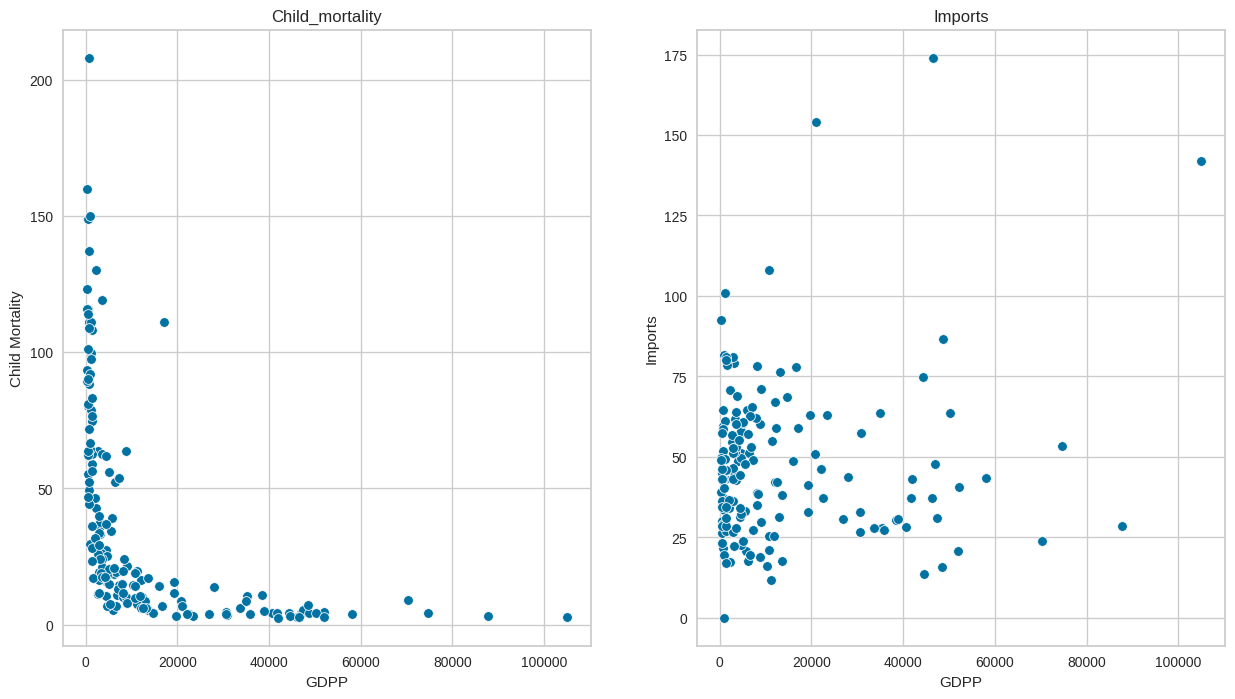

In [29]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x ='gdpp',y = 'child_mort',data = count_data)
plt.title("Child_mortality")
plt.xlabel('GDPP')
plt.ylabel("Child Mortality")
plt.subplot(1,2,2)
sns.scatterplot(x ="gdpp",y = "imports",data = count_data)
plt.title("Imports")
plt.xlabel('GDPP')
plt.ylabel("Imports")
plt.show()

In [30]:
number_of_cluster = range(1,11)
clusterings =[KMeans(n_clusters =k).fit(count_data) for k in number_of_cluster]
centroids =[k.cluster_centers_ for k in clusterings]

D_k = [cdist(count_data,cent,'euclidean') for cent in centroids]
cIdx =[np.argmin(D,axis =1) for D in D_k]
dist =[np.min(D,axis =1 ) for D in D_k]
avg_withinSS =[sum(d)/count_data.shape[0] for d in dist]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

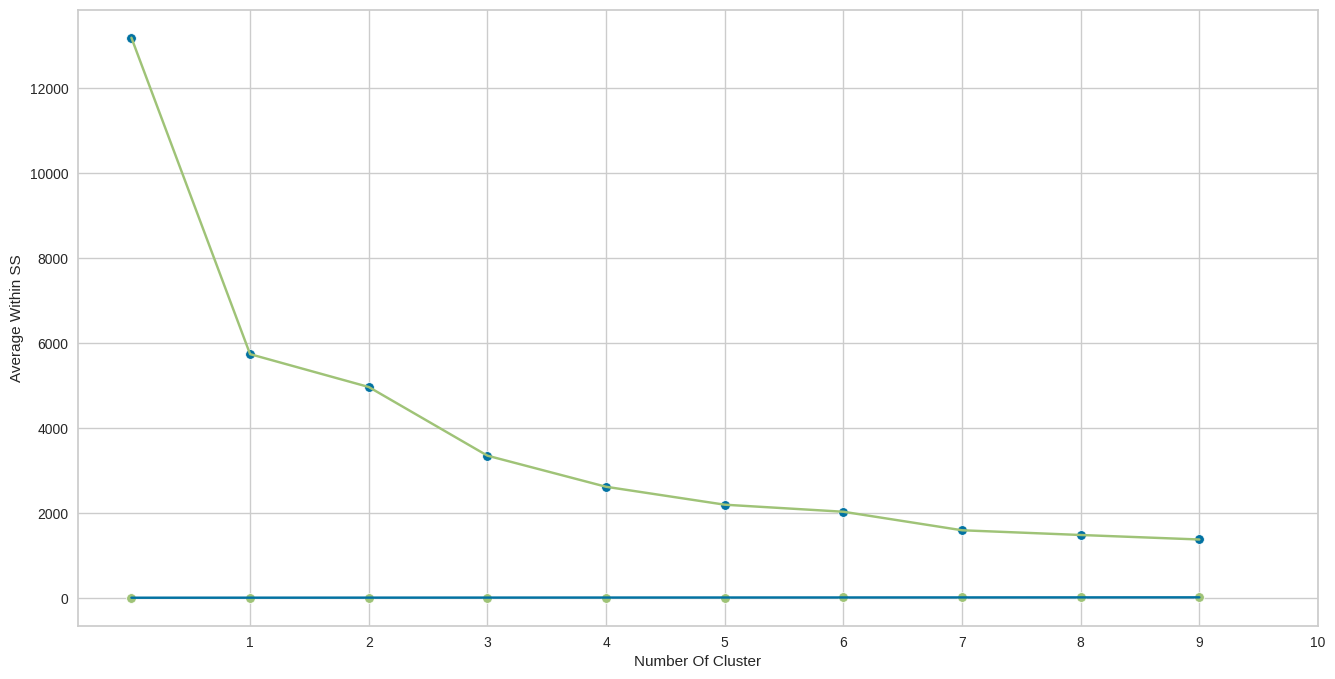

In [38]:
#plt.figure(figsize = (15 ,8))
#p = sns.lineplot(data=(range(1,15),train_scores),marker='*',label='Train Score')
plt.figure(figsize=(16,8))
sns.lineplot(number_of_cluster)
sns.lineplot(avg_withinSS)

sns.scatterplot(avg_withinSS)
sns.scatterplot(number_of_cluster)
plt.xticks(number_of_cluster)
plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within SS')
plt.show()



In [40]:
kmeans = KMeans(n_clusters =2)
kmeans.fit(count_data)
country_clust = count_data.copy()
country_clust['clustkmeans'] = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



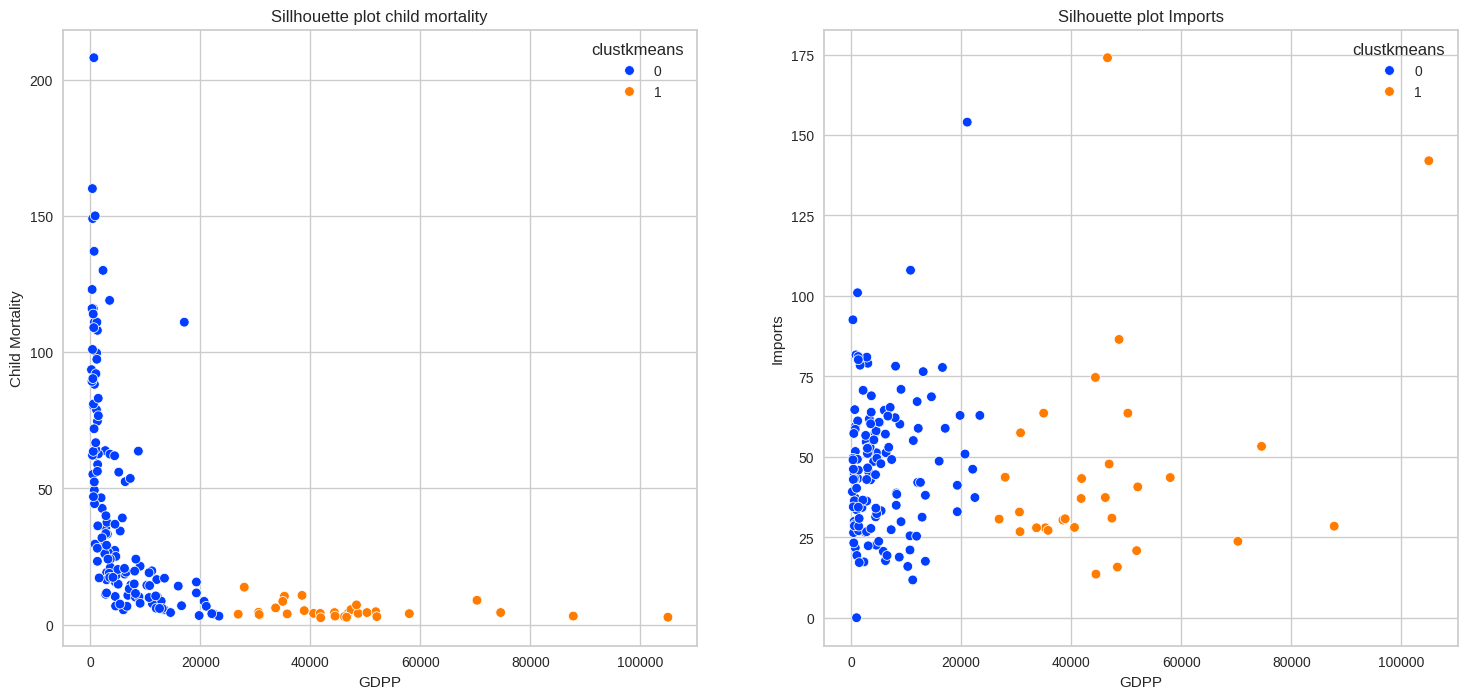

In [41]:
plt.figure(figsize =(18,8))
plt.subplot(1,2,1)
sns.scatterplot(x = 'gdpp',y ='child_mort',data =country_clust,hue = "clustkmeans",palette = 'bright')
plt.title("Sillhouette plot child mortality")
plt.xlabel("GDPP")
plt.ylabel("Child Mortality")
plt.subplot(1,2,2)
sns.scatterplot(x ="gdpp",y = "imports",data = country_clust,hue = "clustkmeans",palette ="bright")
plt.title("Silhouette plot Imports")
plt.xlabel("GDPP")
plt.ylabel("Imports")
plt.show()







In [47]:
cluster_name = ['Cluster 0','Cluster 1']
color =['Blue','Orange']
mortality =['Low GDPP VS Low to medium child mortality','Medium GDPP VS Low child Mortality']
imports =['Low GDPP VS Medium imports','Medium GDPP VS Medium imports']
best_summary =pd.DataFrame({'Color':color,"Name":cluster_name,"Child Mortality":mortality,"Imports":imports})
best_summary




,Color,Name,Child Mortality,Imports
0,Blue,Cluster 0,Low GDPP VS Low to medium child mortality,Low GDPP VS Medium imports
1,Orange,Cluster 1,Medium GDPP VS Low child Mortality,Medium GDPP VS Medium imports


In [52]:
scaler = StandardScaler()
country_clust_scaled = scaler.fit_transform(country_clust)

for eps in [i/10 for i in range(2,5)]:
    for min_samples in range(7,9):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')

        dbscan = DBSCAN(eps = eps,min_samples=min_samples)
        labels =dbscan.fit_predict(country_clust_scaled)
        score = silhouette_score(country_clust_scaled,labels)

        print(f'cluster present :{np.unique(labels)}')
        print(f'cluster sizes :{np.bincount(labels +1 )}')
        print(f'sillhouette score :{score}')





eps 0.2
\min samples 7
cluster present :[-1  0]
cluster sizes :[156  11]
sillhouette score :-0.24688284933527244

eps 0.2
\min samples 8
cluster present :[-1  0]
cluster sizes :[156  11]
sillhouette score :-0.24688284933527244

eps 0.3
\min samples 7
cluster present :[-1  0  1  2]
cluster sizes :[119  30  11   7]
sillhouette score :-0.09959375240643432

eps 0.3
\min samples 8
cluster present :[-1  0  1]
cluster sizes :[130  29   8]
sillhouette score :-0.14215206753357962

eps 0.4
\min samples 7
cluster present :[-1  0  1]
cluster sizes :[ 53 101  13]
sillhouette score :0.41757656863883097

eps 0.4
\min samples 8
cluster present :[-1  0  1  2]
cluster sizes :[70 78 11  8]
sillhouette score :0.22461006503038394


In [53]:
dbscan = DBSCAN(eps = 0.4,min_samples = 7)
labels = dbscan.fit_predict(country_clust_scaled)
country_clust['clustdbscan']= labels



Text(0, 0.5, 'Imports')

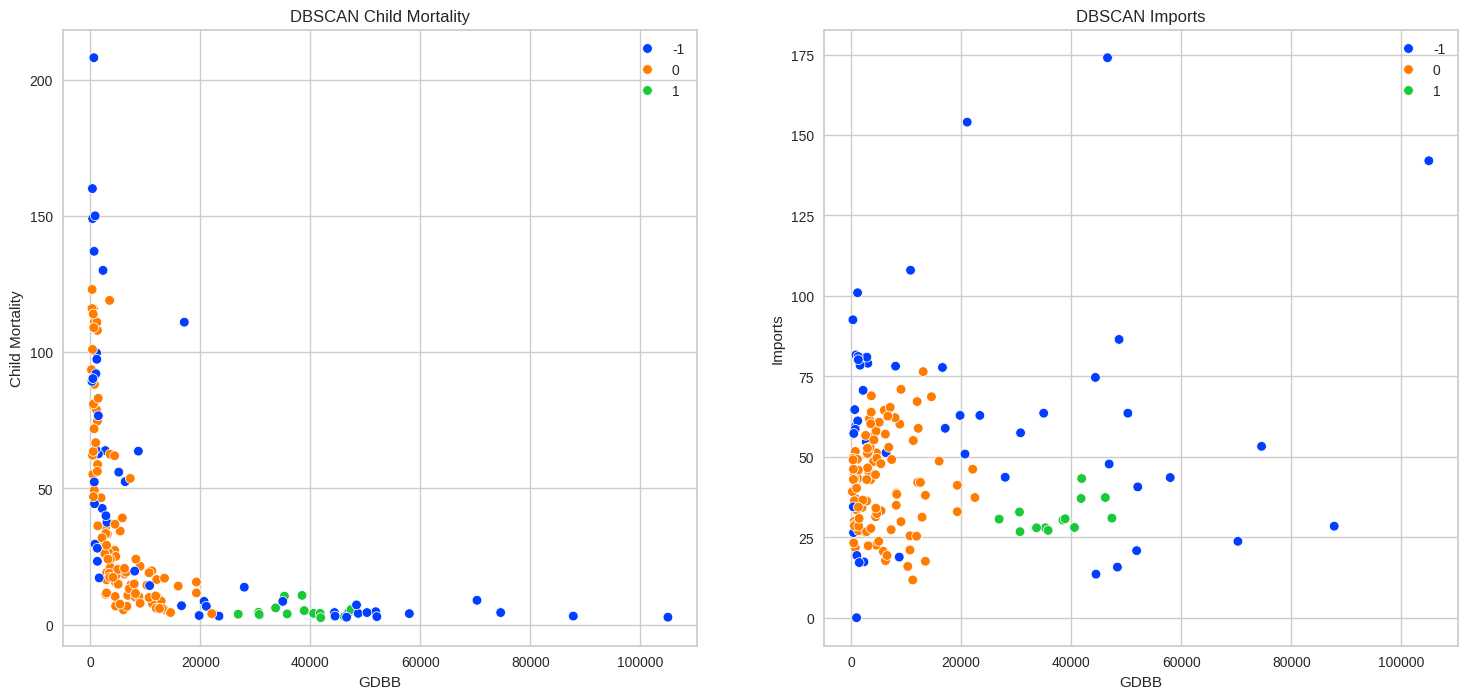

In [55]:
plt.figure(figsize =(18,8))
plt.subplot(1,2,1)
sns.scatterplot(x ="gdpp",y= "child_mort",data = country_clust,hue ="clustdbscan",palette ="bright")
plt.legend(loc = 1)
plt.title('DBSCAN Child Mortality')
plt.xlabel("GDBB")
plt.ylabel("Child Mortality")
plt.subplot(1,2,2)
sns.scatterplot(x = "gdpp",y ="imports",data = country_clust,hue = "clustdbscan",palette ="bright")
plt.legend(loc =1)
plt.title("DBSCAN Imports")
plt.xlabel("GDBB")
plt.ylabel("Imports")


In [56]:
cluster_name =['Cluster -1','Cluster 0','Cluster 1']
color =['Blue','Orange','Green']
mortality =['Noise','Low GDBB VS Low to Medium Imports','Medium GDBB VS Low Imports']
imports =['Noise','Low GDBB VS Low to Imports',"Medium GDBB VS Low Imports"]
dbscan_summary = pd.DataFrame({'Color': color, 'Name': cluster_name,
                        'Child Mortality': mortality, 'Imports': imports})
dbscan_summary



,Color,Name,Child Mortality,Imports
0,Blue,Cluster -1,Noise,Noise
1,Orange,Cluster 0,Low GDBB VS Low to Medium Imports,Low GDBB VS Low to Imports
2,Green,Cluster 1,Medium GDBB VS Low Imports,Medium GDBB VS Low Imports
